In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
C = np.sin(np.linspace(1,5,80)) * 5
NC = C + .5 * np.random.randn(80)

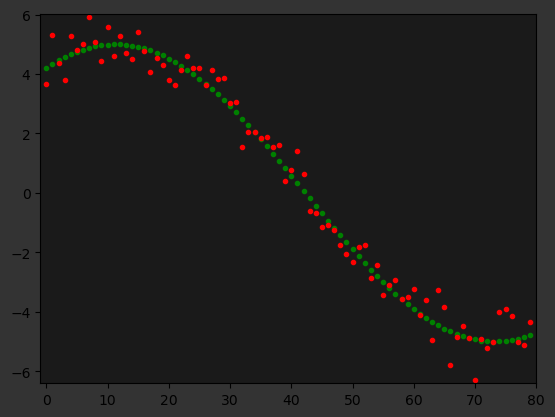

In [18]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.axis([-1,len(NC),min(NC)-0.1,max(NC)+0.1])
plt.plot(C, 'g.', NC, 'r.')
plt.show()

In [19]:
def movAvg(a,n):
    r = a.copy()
    for i in range(1, n):
        r += np.concatenate((r[:i] / i , a[:-i]))
    return r / n

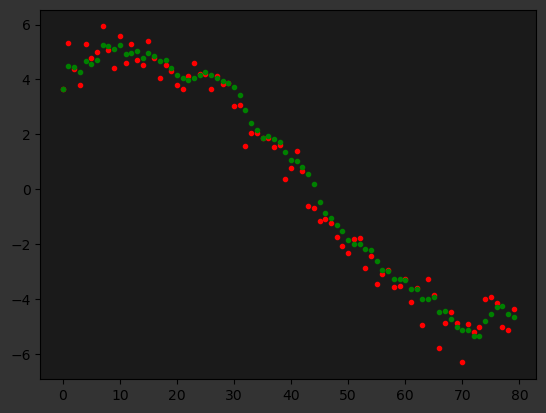

In [20]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', movAvg(NC,4),'g.')
plt.show()

In [21]:
r1 = np.array([1,2,3,4,5,6,7,8])
r2 = np.concatenate((r1[:2], r1[:-2]))
len(r1), len(r2), len(r1[:1]) + len(r1[:-1])

(8, 8, 8)

In [22]:
movAvg(NC,4)[5], NC[2:6].sum() / 4, np.mean(NC[2:6]) #interpretation of movAvg

(4.5569576427204055, 4.5569576427204055, 4.5569576427204055)

-----

In [23]:
#to use pandas method for moving avg your data format has to be pd.Series
import pandas as pd
p_data = pd.Series(NC) 

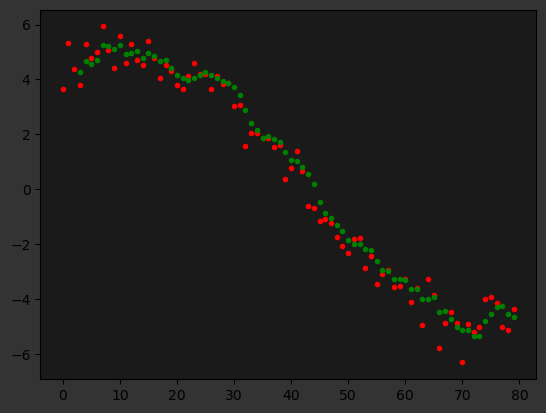

In [24]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', p_data.rolling(window=4).mean(),'g.')
plt.show()

In [25]:
p2 = p_data.rolling(window=8).mean() 
p_data[:8].sum() / 8, p2[7] #basically it does the same as movAvg

(4.767890862527844, 4.767890862527844)

In [26]:
p2[:10] #But notice

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7    4.767891
8    4.943800
9    4.833008
dtype: float64

In [27]:
#and to fix it
p2[:8] = np.array([(NC[:i+1].sum() / (i+1)) for i in range(8)])
p2[:10]

0    3.665970
1    4.491954
2    4.451914
3    4.284579
4    4.483406
5    4.535290
6    4.602065
7    4.767891
8    4.943800
9    4.833008
dtype: float64

In [28]:
movAvg(NC,8)[:10], p2[:10]

(array([3.66597017, 4.49195412, 4.45191429, 4.28457869, 4.48340563,
        4.5352898 , 4.60206524, 4.76789086, 4.94380031, 4.83300825]),
 0    3.665970
 1    4.491954
 2    4.451914
 3    4.284579
 4    4.483406
 5    4.535290
 6    4.602065
 7    4.767891
 8    4.943800
 9    4.833008
 dtype: float64)

In [42]:
def window(a,w):
    return np.concatenate((np.full(len(w)-1, float('NaN')),
                    np.convolve(a, w, mode='valid')))

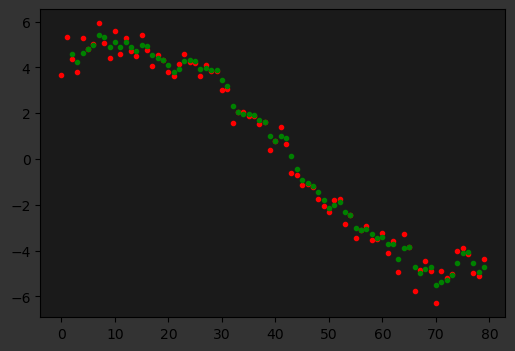

In [47]:
plt.figure(facecolor='0.2',figsize=(6,4))
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', window(NC, [.5, .3333, .1666]) ,'g.')
plt.show()